## - 불러올 패키지 목록

In [54]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.formula.api import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 단순 회귀분석

In [2]:
df_sales = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Sales.csv',
                        index_col = 'Company')

df_sales

,Adver,Sales
Company,,
1,11,23
2,19,32
3,23,36
4,26,46
5,56,93
6,62,99
7,29,49
8,30,50
9,38,65


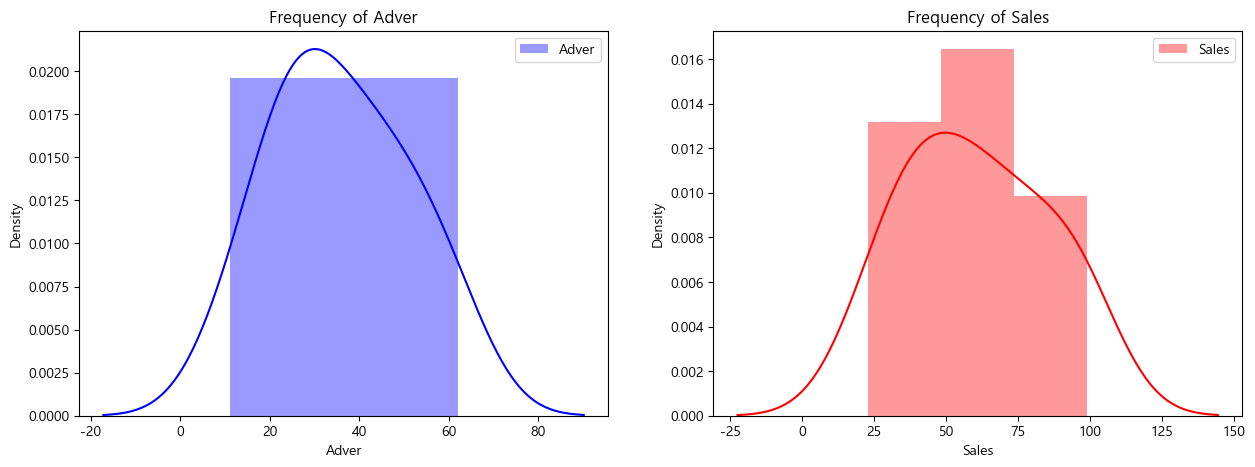

In [3]:
plt.figure( figsize = (15,5) )

ax1 = plt.subplot( 121 )
ax1 = sb.distplot( df_sales.Adver, label = 'Adver', color = 'blue' )
ax1.set( title = "Frequency of Adver")
plt.legend()

ax2 = plt.subplot( 122 )
ax2 = sb.distplot( df_sales.Sales, label = 'Sales', color = 'red'  )
ax2.set( title = "Frequency of Sales")
plt.legend()

plt.show()

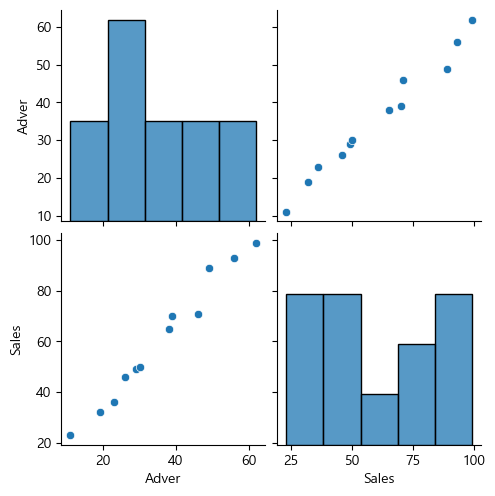

In [4]:
sb.pairplot( df_sales )

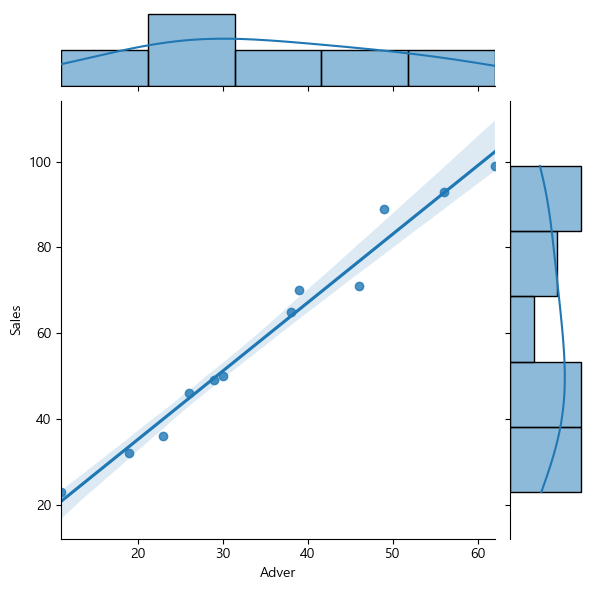

In [5]:
sb.jointplot( x = df_sales.Adver,
              y = df_sales.Sales,
              kind = 'reg' )

plt.show()

## 선형 회귀모델 생성 및 회귀분석

- `statsmodels.formula.api.ols( formula, data, subset=None, drop_cols=None, *args, **kwargs )` https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html

- https://www.statsmodels.org/stable/example_formulas.html

In [6]:
model = ols( formula = 'Sales ~ Adver', data = df_sales )

sales_fit = model.fit()

print( sales_fit.summary() )

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     455.5
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           1.14e-09
Time:                        18:08:21   Log-Likelihood:                -32.059
No. Observations:                  12   AIC:                             68.12
Df Residuals:                      10   BIC:                             69.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2848      2.889      1.137      0.2

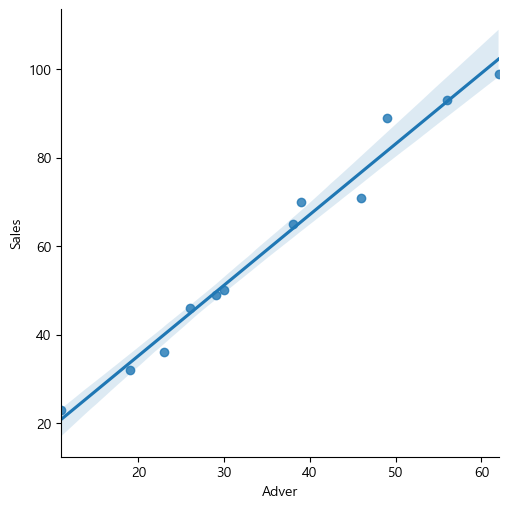

In [7]:
sb.lmplot( x = 'Adver',
           y = 'Sales',
           data = df_sales )

<AxesSubplot:xlabel='Adver', ylabel='Sales'>

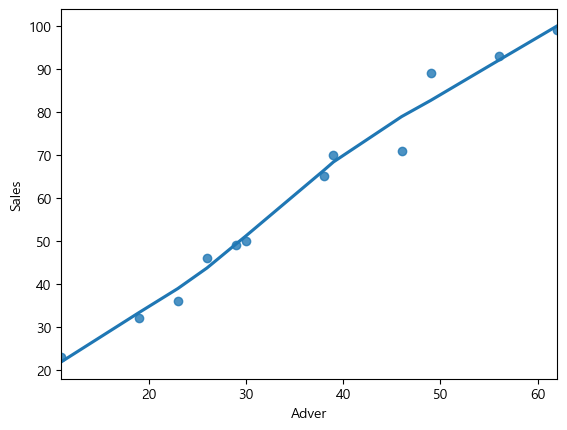

In [8]:
sb.regplot( x = 'Adver',
           y = 'Sales',
           data = df_sales, lowess = True )

## 반응변수에 대한 예측

- `statsmodels.regression.linear_model.RegressionResults.predict( exog=None, transform=True, *args, **kwargs )` : Call self.model.predict with self.params as the first argument.  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.predict.html

- `statsmodels.regression.linear_model.RegressionResults.get_prediction( exog=None, transform=True, weights=None, row_labels=None, **kwargs )` : Compute prediction results.  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.get_prediction.html

- `statsmodels.regression.linear_model.PredictionResults.summary_frame( alpha=0.05 )`

In [9]:
# 예측값
sales_fit.predict()

array([ 20.85350521,  33.63074676,  40.01936754,  44.81083312,
        92.72548895, 102.30842012,  49.6022987 ,  51.1994539 ,
        63.97669545,  65.57385065,  76.75393701,  81.54540259])

In [10]:
# 예측값 출력

predictions = sales_fit.get_prediction()

predictions.summary_frame( alpha = 0.05 ).round(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
Company,,,,,,
1,20.854,2.152,16.058,25.649,11.057,30.650
2,33.631,1.667,29.916,37.346,24.316,42.946
3,40.019,1.457,36.773,43.266,30.881,49.158
4,44.811,1.322,41.865,47.757,35.775,53.847
5,92.725,1.881,88.533,96.918,83.210,102.241
6,102.308,2.260,97.273,107.344,92.392,112.224
7,49.602,1.214,46.897,52.307,40.642,58.562
8,51.199,1.185,48.559,53.840,42.258,60.140
9,63.977,1.120,61.480,66.473,55.077,72.876


In [11]:
# 생성한 회귀모델을 새로운 데이터에 적용하여 예측

new_data = pd.DataFrame( { 'Adver' : [70,80,90,100] } )

new_pred = sales_fit.get_prediction( new_data )

new_pred.summary_frame( alpha = 0.05 ).round(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,115.086,2.797,108.853,121.319,104.511,125.660
1,131.057,3.497,123.265,138.850,119.495,142.620
2,147.029,4.214,137.640,156.418,134.336,159.722
3,163.000,4.940,151.994,174.007,149.068,176.933


## 잔차분석

### 표준화 잔차

- `statsmodels.regression.linear_model.RegressionResults.resid` : The residuals of the model.

- `statsmodels.regression.linear_model.RegressionResults.resid_pearson` : Residuals, normalized to have unit variance.

In [13]:
# 예측값
pred = sales_fit.predict()

# 잔차
residual = sales_fit.resid

# 표준화 잔차
r_std = sales_fit.resid_pearson

pd.DataFrame( { 'Predict' : pred,
                'Residual' : residual,
                'studentized Residual' : r_std } ).round(3)

,Predict,Residual,studentized Residual
Company,,,
1,20.854,2.146,0.560
2,33.631,-1.631,-0.425
3,40.019,-4.019,-1.048
4,44.811,1.189,0.310
5,92.725,0.275,0.072
6,102.308,-3.308,-0.863
7,49.602,-0.602,-0.157
8,51.199,-1.199,-0.313
9,63.977,1.023,0.267


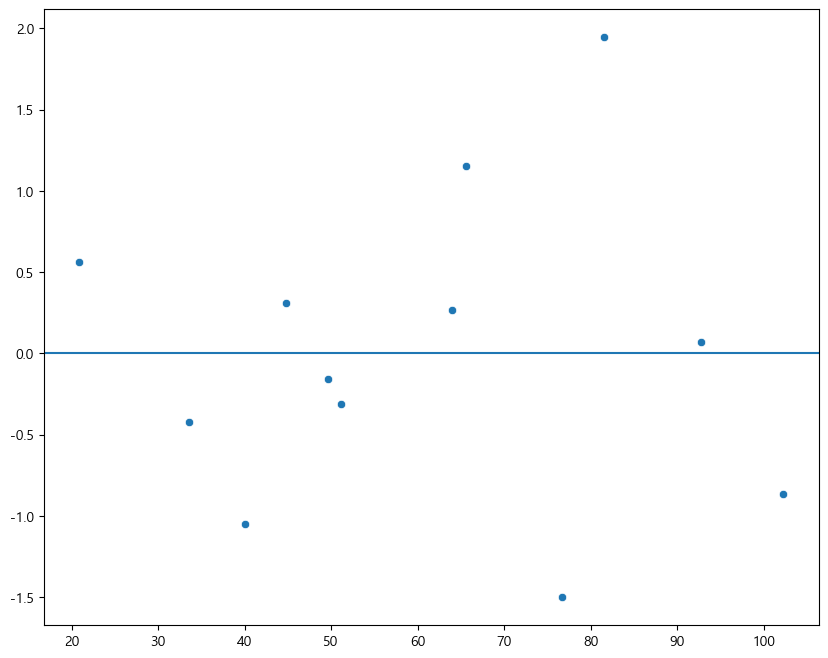

In [14]:
fig, ax = plt.subplots( figsize = (10,8) )
sb.scatterplot( x = pred, y =r_std )
ax.axhline(y=0)

### 정규성 검토

<AxesSubplot:ylabel='Density'>

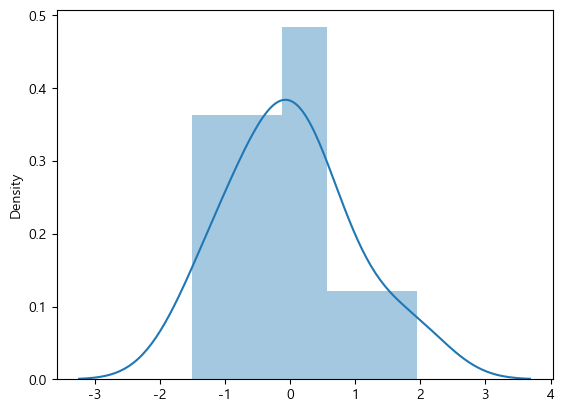

In [15]:
sb.distplot( r_std )

<AxesSubplot:ylabel='Density'>

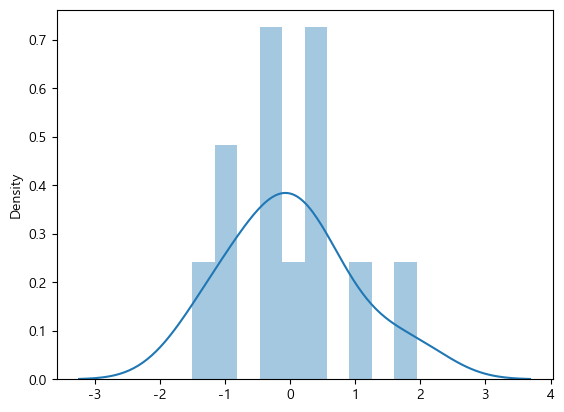

In [16]:
sb.distplot( r_std, bins = 10 )

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([-1.50086884, -1.04842015, -0.86297515, -0.42536736, -0.31286804,
         -0.15710484,  0.07160403,  0.26692088,  0.31018475,  0.55989614,
          1.15452596,  1.94447261])),
 (1.0149301645279463, -7.696993776987073e-15, 0.9869321023876501))

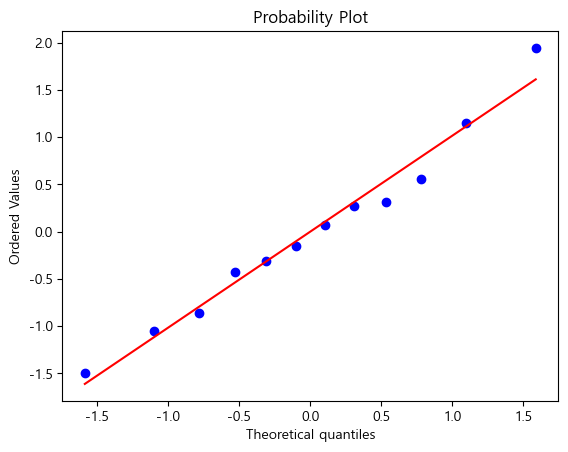

In [17]:
# Q-Q plot

stats.probplot( r_std, plot = plt )

### 등분산성 검토

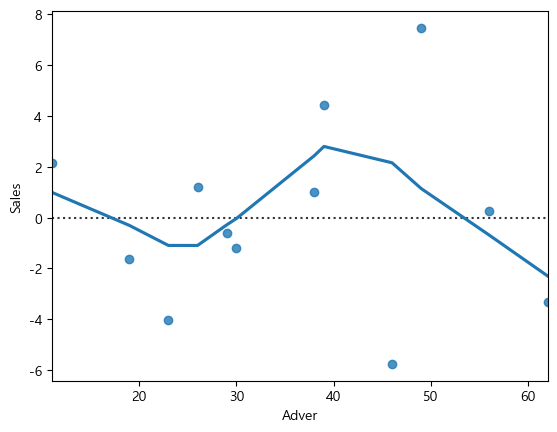

In [18]:
# 잔차 확인
sb.residplot( data = df_sales,
              x = 'Adver', y = 'Sales',
              lowess = True )
plt.show()

### 오차항의 독립성 검토

- Durbin-Watson 통계량 :  
2 에 가까우면 독립성 만족,  
0 에 가까우면 양(+)의 자기상관관계,  
4 에 가까우면 음(-)의 자기상관관계

- `statsmodels.stats.stattools.durbin_watson( resids, axis=0 )` https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html

- 회귀모델 `statsmodels.formula.api.ols()` 의 summary() 결과에도 포함되어 있음

In [19]:
# 더빈-왓슨 통계량
durbin_watson( r_std )

2.470311745748765

### 회귀진단 결과 플로팅

- `statsmodels.graphics.regressionplots.plot_regress_exog(results, exog_idx, fig=None)` https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html

<Figure size 1200x800 with 0 Axes>

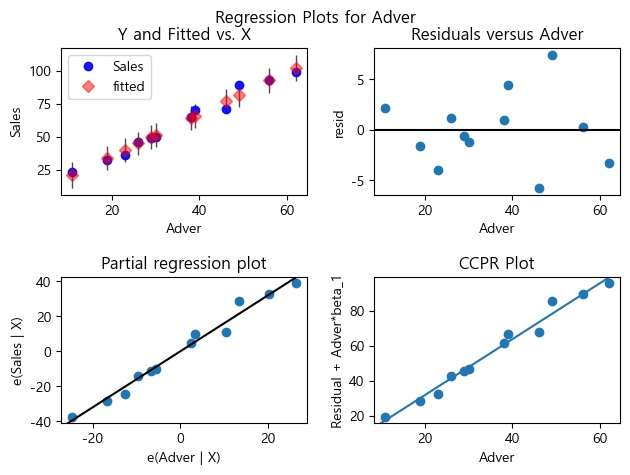

In [12]:
fig = plt.figure(figsize = (12, 8))
fig = graphics.plot_regress_exog( sales_fit, 'Adver' )
plt.show()

# 다중 회귀분석

In [25]:
df_satisfaction = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Satisfaction.csv',
                            index_col = 'ID' )

df_data = df_satisfaction.iloc[:, 0:5]
df_data

,Y,X1,X2,X3,X4
ID,,,,,
1,5,5,5,6,5
2,5,5,5,5,5
3,5,5,6,5,5
4,5,6,6,5,6
5,5,5,6,5,5
...,...,...,...,...,...
696,3,4,5,6,4
697,4,3,3,3,5
698,5,6,6,5,6


In [26]:
df_data.pairwise_corr(method='pearson').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Y,X1,pearson,two-sided,700,0.295,"[0.23, 0.36]",0.0,2.559e+12,1.0
1,Y,X2,pearson,two-sided,700,0.288,"[0.22, 0.35]",0.0,5.229e+11,1.0
2,Y,X3,pearson,two-sided,700,0.318,"[0.25, 0.38]",0.0,6.462e+14,1.0
3,Y,X4,pearson,two-sided,700,0.207,"[0.13, 0.28]",0.0,1.933e+05,1.0
4,X1,X2,pearson,two-sided,700,0.397,"[0.33, 0.46]",0.0,4.153e+24,1.0
5,X1,X3,pearson,two-sided,700,0.446,"[0.38, 0.5]",0.0,1.582e+32,1.0
6,X1,X4,pearson,two-sided,700,0.312,"[0.24, 0.38]",0.0,1.565e+14,1.0
7,X2,X3,pearson,two-sided,700,0.582,"[0.53, 0.63]",0.0,1.278e+61,1.0
8,X2,X4,pearson,two-sided,700,0.361,"[0.29, 0.42]",0.0,5.923e+19,1.0
9,X3,X4,pearson,two-sided,700,0.430,"[0.37, 0.49]",0.0,3.257e+29,1.0


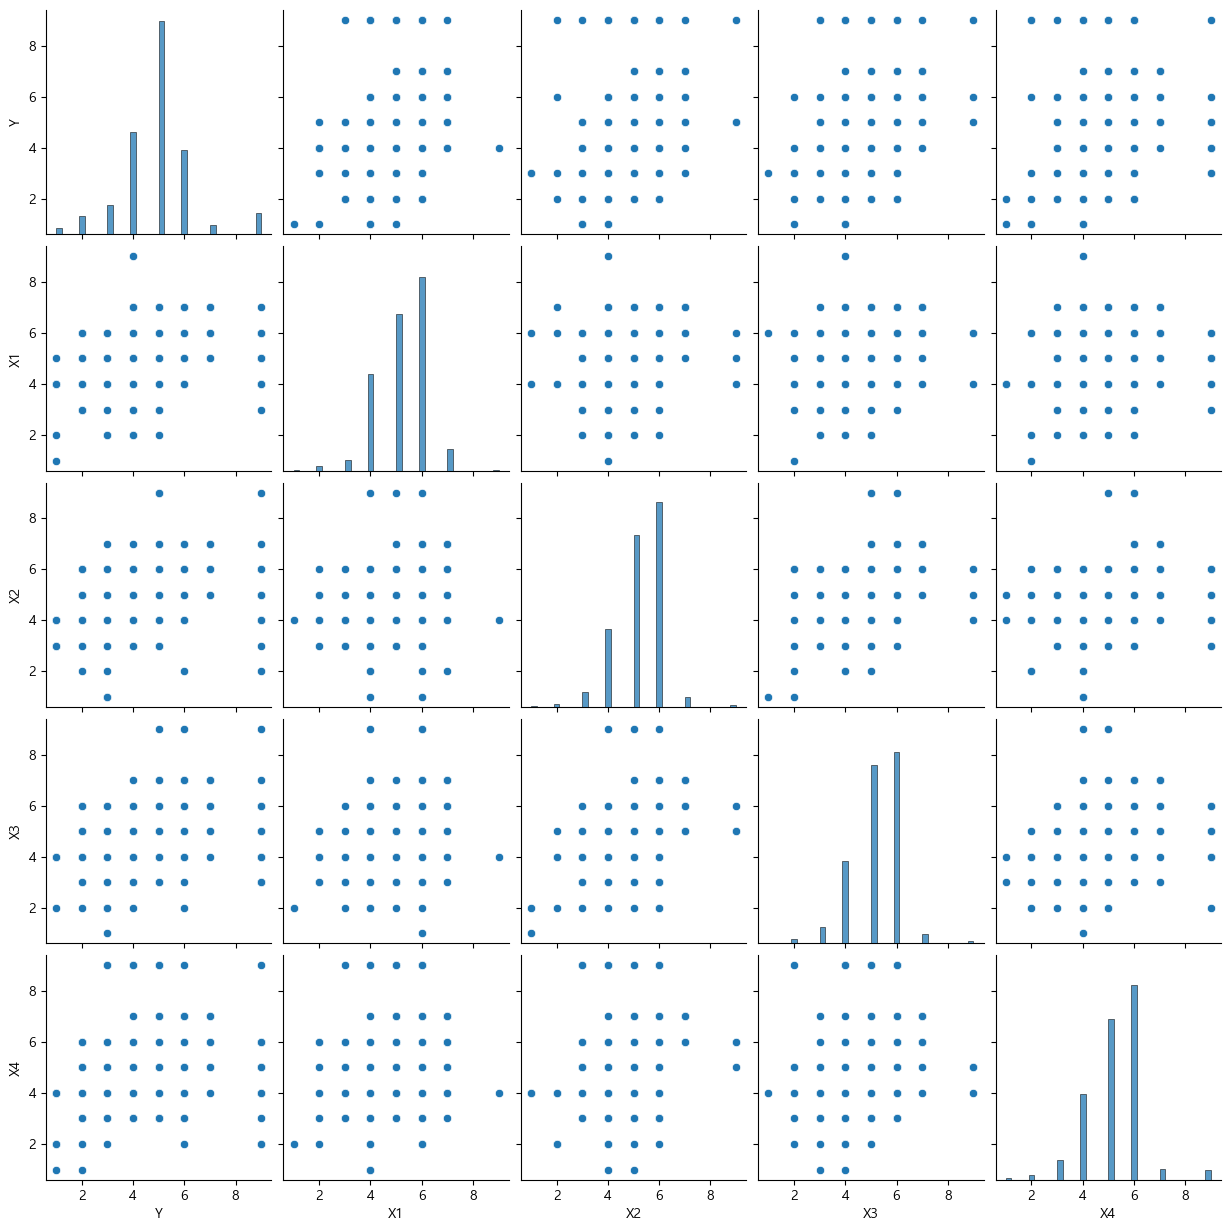

In [28]:
sb.pairplot( df_data )

## 다중 회귀모델 생성 및 회귀분석

In [30]:
model = ols( data = df_data, formula = 'Y ~ X1+X2+X3+X4')

model_fit = model.fit()

print( model_fit.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     28.56
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           5.38e-22
Time:                        18:50:49   Log-Likelihood:                -1174.4
No. Observations:                 700   AIC:                             2359.
Df Residuals:                     695   BIC:                             2382.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2918      0.347      3.719      0.0

## 표준화 회귀계수

In [37]:
df_data_z = df_data.iloc[:, 0:5].apply(stats.zscore)
df_data_z

,Y,X1,X2,X3,X4
ID,,,,,
1,0.077671,-0.223819,-0.241429,0.854490,-0.203835
2,0.077671,-0.223819,-0.241429,-0.182153,-0.203835
3,0.077671,-0.223819,0.814822,-0.182153,-0.203835
4,0.077671,0.800191,0.814822,-0.182153,0.699232
5,0.077671,-0.223819,0.814822,-0.182153,-0.203835
...,...,...,...,...,...
696,-1.353118,-1.247830,-0.241429,0.854490,-1.106902
697,-0.637724,-2.271840,-2.353929,-2.255440,-0.203835
698,0.077671,0.800191,0.814822,-0.182153,0.699232


In [40]:
model_z = ols( data = df_data_z,
               formula = 'Y ~ X1+X2+X3+X4')

model_z_fit = model_z.fit()

model_z_fit.params.round(4)

Intercept    0.0000
X1           0.1643
X2           0.1128
X3           0.1594
X4           0.0463
dtype: float64

## 변수 선택

In [42]:
# X4 의 p값이 0.243 으로 유의수준 5% 보다 크므로 반응변수를 설명하는데 유의하지 않으므로 제거 
model = ols( data = df_data, formula = 'Y ~ X1+X2+X3')

model_fit = model.fit()

print( model_fit.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           1.56e-22
Time:                        20:44:03   Log-Likelihood:                -1175.1
No. Observations:                 700   AIC:                             2358.
Df Residuals:                     696   BIC:                             2376.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4020      0.334      4.193      0.0

## 다중공선성

In [47]:
df_multico = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\Multico.csv',
                         index_col = 'ID')

df_multico               

,Y,X1,X2,X3,X4
ID,,,,,
1,4.0,4.0,4.0,4.0,4.0
2,4.0,4.0,4.0,3.0,3.5
3,4.0,4.0,3.0,4.5,4.0
4,4.0,4.0,4.0,3.0,3.5
5,5.0,5.0,5.0,4.0,4.5
6,4.0,4.0,5.0,3.0,3.5
7,4.0,4.0,4.0,3.0,3.5
8,5.0,5.0,4.0,4.0,4.5
9,4.0,4.0,4.0,3.5,4.0


In [52]:
model = ols( data = df_multico, formula = 'Y ~ X1+X2+X3+X4')

model_fit = model.fit()

print( model_fit.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     4.404
Date:                Wed, 25 Aug 2021   Prob (F-statistic):             0.0149
Time:                        20:50:58   Log-Likelihood:                -5.8055
No. Observations:                  20   AIC:                             21.61
Df Residuals:                      15   BIC:                             26.59
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1511      0.858      1.341      0.2

### 다중공선성의 진단

#### VIF (분산확대인자)

In [59]:
print( variance_inflation_factor( model.exog, 0) )
print()
print( variance_inflation_factor( model.exog, 1) )
print()
print( variance_inflation_factor( model.exog, 2) )
print()
print( variance_inflation_factor( model.exog, 3) )
print()
print( variance_inflation_factor( model.exog, 4) )
print()

105.59693699965166

6.927097111033759

1.440306300034806

17.68846153846154

31.44239470936308



In [68]:
for i, column in enumerate(model.exog_names):
    print( i, column )

0 Intercept
1 X1
2 X2
3 X3
4 X4


In [65]:
pd.DataFrame( {'X' : column,
               'VIF' : variance_inflation_factor( model.exog, i)}
               for i, column in enumerate(model.exog_names)  )

,X,VIF
0,Intercept,105.596937
1,X1,6.927097
2,X2,1.440306
3,X3,17.688462
4,X4,31.442395


#### 상태지수

In [69]:
model_fit.condition_number

113.35081366105277

### 다중공선성에 대한 대책

- 다중공선성과 관련있는 일부 변수 제거
- 더 넓은 범위의 독립변수들의 값에서 새로운 관측치를 얻어낸다.
- 능형회귀 또는 주성분 분석 등의 편의 추정법을 사용한다.

In [76]:
df_multico.pairwise_corr(method='pearson').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Y,X1,pearson,two-sided,20,0.649,"[0.29, 0.85]",0.002,24.253,0.903
1,Y,X2,pearson,two-sided,20,0.166,"[-0.3, 0.57]",0.485,0.348,0.108
2,Y,X3,pearson,two-sided,20,0.502,"[0.08, 0.77]",0.024,2.975,0.642
3,Y,X4,pearson,two-sided,20,0.670,"[0.32, 0.86]",0.001,36.18,0.927
4,X1,X2,pearson,two-sided,20,0.363,"[-0.1, 0.69]",0.116,0.879,0.360
5,X1,X3,pearson,two-sided,20,0.313,"[-0.15, 0.66]",0.180,0.643,0.275
6,X1,X4,pearson,two-sided,20,0.686,"[0.35, 0.87]",0.001,50.019,0.942
7,X2,X3,pearson,two-sided,20,0.221,"[-0.25, 0.6]",0.349,0.417,0.157
8,X2,X4,pearson,two-sided,20,0.408,"[-0.04, 0.72]",0.074,1.227,0.445
9,X3,X4,pearson,two-sided,20,0.879,"[0.72, 0.95]",0.000,4.771e+04,1.000


In [78]:
model = ols( data = df_multico, formula = 'Y ~ X1+X3')

model_fit = model.fit()

print( model_fit.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     9.231
Date:                Wed, 25 Aug 2021   Prob (F-statistic):            0.00193
Time:                        22:22:32   Log-Likelihood:                -6.2205
No. Observations:                  20   AIC:                             18.44
Df Residuals:                      17   BIC:                             21.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9231      0.776      1.190      0.2

## 가변수 - 질적 설명변수의 처리

## 변수변환과 비선형 회귀분석

### 변수변환에 의한 곡선 추정

### 비선형 회귀분석